In [263]:
import numpy as np
import pandas as pd
import os

In [264]:
# mini_newsgroup dataset available on uci repository is used for faster runtime
# there are 20 categories(groups) in total
# each of the categories has 100 documents(articles) 
path = r'C:/Users/rahul__ohlan/Downloads/new_folder2/mini_newsgroups'    # modify file path as suitable
groups = os.listdir(path)
groups       #groups are our classes (categories) in which we need to classify a random text article. 

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [265]:
# we have 20 groups in total
groups[19]

'talk.religion.misc'

In [266]:
# now we have around 100 text files (datapoints) for each of the groups (classes)
# get a list of stop words, punctuations
from nltk.corpus import stopwords
from string import punctuation

punctuations = list(punctuation)
stop_words = stopwords.words('english')
stop_words += punctuations

In [267]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [268]:
# find word-frequency pairs from complete training dataset
word_freq = {}
for group in groups:

    article_directory = os.path.join(path,group)
    articles = os.listdir(article_directory)
    for article in articles:
        with open(os.path.join(article_directory,article),encoding='latin-1') as file:
            data = file.read()
            words = data.split(' ')
            for word in words:
                # exclude words that are not in stop words, have length <=2, start with a "'" or "."
                if word.lower() not in stop_words and (len(word) > 2) and word[0]!="'" and word!="n't" and word[0]!=".":
                    word = word.strip()
                    word_freq[word] = word_freq.get(word,0) + 1
# now we have word-frequency pairs of overall data

In [269]:
# sort the word frequency pairs in a see how many words have very low frequencies and
# hence are irrelevant to classification
from operator import itemgetter
sorted_word_freq = sorted(word_freq.items(),key=itemgetter(1), reverse=True )
y = [word[1] for word in sorted_word_freq]
len(y)

121597

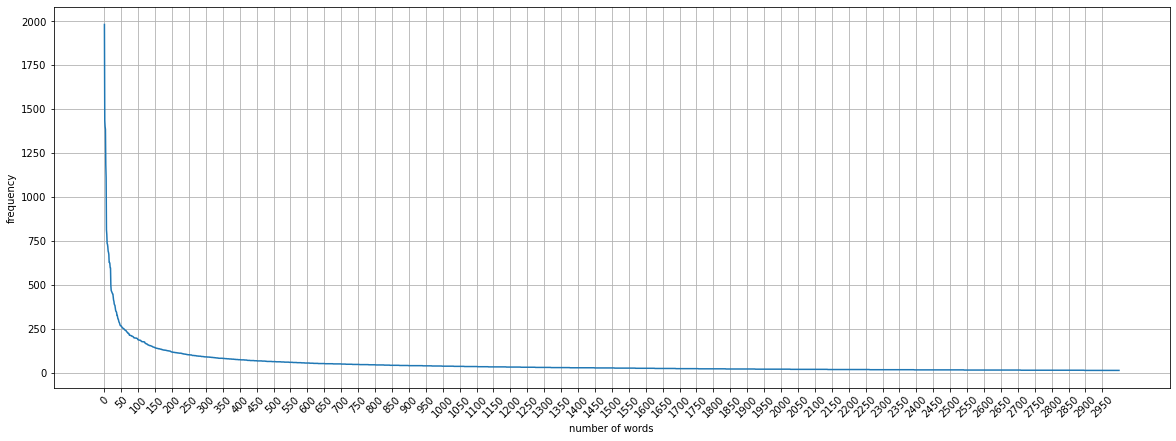

In [270]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,7))
plt.plot(np.arange(len(y))[0:3000],y[0:3000])
plt.xlabel('number of words')
plt.xticks(np.arange(0,3000,50),rotation=45)
plt.ylabel('frequency')
plt.grid()
plt.show()

In [325]:
# in total there are 1,21,597 unique words in the dataset
# most of the words starting from index ~ 4000 have very low frequency (~10)
# such words are apparantely useless to classification
print(y[4],y[5000])

1184 9


In [280]:
# hence for feature set we'll only consider words who have frequency more than 10, and hence taking top 4000 words
features = sorted_word_freq[0:4000] # top 4000 word-frequency pairs
feature_words = np.array([item[0] for item in features]) # top 4000 words
len(features)

4000

In [279]:
features[3999]

('ANSI', 11)

In [281]:
# we have our top 4000 words as our features
# now need to transform the data into a proper dataset form
# look for each word of an article in the feature names, if present, compute it's frequency in the article
# and impute it as a datapoint to it's corresponging class
y_train = list()
x_train = list()

for group in groups:
    
    article_directory = os.path.join(path,group)
    articles = os.listdir(article_directory)
    for article in articles:
        with open(os.path.join(article_directory,article),encoding='latin-1') as file:
            y_train.append(group)
            data = file.read()
            words = data.split(' ')
            word_vector = [0]*len(feature_words)  # get the frequency of each of each of the feature word for all articles
            for word in words:
                word = word.strip()
                if word in feature_words:
                    index = np.where(feature_words == word)[0][0]
                    word_vector[index] +=1
                    
        x_train.append(word_vector)
        
        
# for any manual test data point, same procedure needs to be followed
# convert every document to a word-vector with freqency of each of the feature words in the document at the 
# respective index

In [282]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [283]:
x_train.shape[1]

4000

In [284]:
y_train

array(['alt.atheism', 'alt.atheism', 'alt.atheism', ...,
       'talk.religion.misc', 'talk.religion.misc', 'talk.religion.misc'],
      dtype='<U24')

In [292]:
# now we have data in the correct form
# where each datapoint contains the frequency of words in an article corresponding to feature name and group (category)
def fit(x_train,y_train):
    
    result = dict()
    num_labels = y_train.shape[0]      # total number of datapoints. It will be used to compute prior probability
                                       # for each class
    unique_labels = set(y_train)       # get unique categroies from all of the dataset
    num_features = x_train.shape[1]
    
    for label in unique_labels:
        
        result[label] = dict()
        curr_x_train = x_train[y_train == label]
        curr_y_train = y_train[y_train == label]
        result[label]['prior_probability'] = np.log(curr_y_train.shape[0]) - np.log(num_labels)

        
        for feature in range(num_features):
            
            result[label][feature] = dict()
            curr_col_sum = curr_x_train[:,feature].sum(axis=0) # count of each feature word in all the documents belonging to a category
            total_words = curr_x_train.sum()             # count of all the words in a category
            result[label][feature] = np.log(curr_col_sum+1) - np.log(total_words+x_train.shape[1])  # probability of each feature word to belong to a category with laplace smoothing
        
    return result    
# structure of result dictionary

# {label_1 : {feature_word_1(index basically): probability(feature_word | label_1),
#                 ...
#                 prior_probability: prior_probability(label_1) with laplace smoothing},
        
#         label_20: ...}

In [294]:
res = fit(x_train,y_train)

In [298]:
def compute_probability(dictionary, x, label):
    
    # we have frequency of each word in our test datapoint
    # compute the likelihood and mulitply by this frequency
    output = dictionary[label]['prior_probability']
    num_features = len(dictionary[label].keys())-1      # -1 as one of keys is 'prior_probability'
    for j in range(num_features):
        freq = x[j]
        output += freq*dictionary[label][j]   # need to multiply frequency with probability to get multinomial probabilty
        
    return output

In [300]:
def predict(dictionary,x_test):
    
    predictions = list()
    classes = set(dictionary.keys())
    
    for x in x_test:         # x_test is set of datapoints in the same format as x_train
        
        best_class = None
        best_probability = float('-inf')
        
        for label in classes:
            
            proby = compute_probability(dictionary,x,label)   # find out all the probabilities of data point belonging to each of the classes
            
            if proby > best_probability:          # make prediction for the class with maximum probability
                best_probability = proby
                best_class = label
                
        predictions.append(best_class)
        
    return predictions
    

In [306]:
pred = predict(res,x_train[0:50])

In [308]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(x_train,y_train)    # getting random test dataset from the training data

In [309]:
X_train.shape

(1500, 4000)

In [310]:
X_test.shape

(500, 4000)

In [311]:
pred = predict(res,X_test)

In [315]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Y_test,pred))

[[20  0  0  0  0  0  1  0  0  0  2  0  0  0  0  0  0  0  0  1]
 [ 0 16  0  0  0  5  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0 19  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  4  0  1  3 18  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  1  0  1  4  0 20  2  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1 16  0  0  1  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  2  2  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0 29  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  1  0  6 19  0  0  0  0  1  1  0  0  0]
 [ 0  1  0  0  0  0  2  0  0  0  0 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  1  0  0  0  0  0 22  0  0  0  0  0  0  0]
 [ 5  0  0  0  2  0  1  0  0  0  0  0  1 22  0  0  1  0  0  1]
 [ 1  0  0  0  0  0  0  1  0  1  1  0  0  0 22  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  0  0 21  0  0

In [316]:
print(classification_report(Y_test,pred))

                          precision    recall  f1-score   support

             alt.atheism       0.62      0.83      0.71        24
           comp.graphics       0.73      0.73      0.73        22
 comp.os.ms-windows.misc       1.00      0.95      0.97        20
comp.sys.ibm.pc.hardware       0.90      1.00      0.95        18
   comp.sys.mac.hardware       0.69      0.95      0.80        21
          comp.windows.x       0.62      0.62      0.62        29
            misc.forsale       0.59      0.69      0.63        29
               rec.autos       0.76      0.80      0.78        20
         rec.motorcycles       1.00      0.85      0.92        27
      rec.sport.baseball       0.81      0.91      0.85        32
        rec.sport.hockey       0.66      0.63      0.64        30
               sci.crypt       1.00      0.86      0.92        21
         sci.electronics       0.85      0.85      0.85        26
                 sci.med       0.96      0.67      0.79        33
         

In [317]:
### now using sklearn multinomial naive bayes classifier

In [318]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [319]:
clf.fit(x_train,y_train)

MultinomialNB()

In [320]:
pred2 = clf.predict(X_test)

In [322]:
print(confusion_matrix(Y_test,pred2))

[[20  0  0  0  0  0  1  0  0  0  2  0  0  0  0  0  0  0  0  1]
 [ 0 16  0  0  0  5  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0 19  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  4  0  1  3 18  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  1  0  1  4  0 20  2  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1 16  0  0  1  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  2  2  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0 29  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  1  0  6 19  0  0  0  0  1  1  0  0  0]
 [ 0  1  0  0  0  0  2  0  0  0  0 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  1  0  0  0  0  0 22  0  0  0  0  0  0  0]
 [ 5  0  0  0  2  0  1  0  0  0  0  0  1 22  0  0  1  0  0  1]
 [ 1  0  0  0  0  0  0  1  0  1  1  0  0  0 22  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  0  0 21  0  0

In [323]:
print(classification_report(Y_test,pred2))

                          precision    recall  f1-score   support

             alt.atheism       0.62      0.83      0.71        24
           comp.graphics       0.73      0.73      0.73        22
 comp.os.ms-windows.misc       1.00      0.95      0.97        20
comp.sys.ibm.pc.hardware       0.90      1.00      0.95        18
   comp.sys.mac.hardware       0.69      0.95      0.80        21
          comp.windows.x       0.62      0.62      0.62        29
            misc.forsale       0.59      0.69      0.63        29
               rec.autos       0.76      0.80      0.78        20
         rec.motorcycles       1.00      0.85      0.92        27
      rec.sport.baseball       0.81      0.91      0.85        32
        rec.sport.hockey       0.66      0.63      0.64        30
               sci.crypt       1.00      0.86      0.92        21
         sci.electronics       0.85      0.85      0.85        26
                 sci.med       0.96      0.67      0.79        33
         

In [ ]:
# Observation: Precision and Recall for most of the classes is pretty good except for just a few
# results of self-implemented naive-Bayes and sklearn's MultiNomial NB are nearly exactly the same